# New Section


Parkinsons Telemonitoring Data Set  

Abstract: Oxford Parkinson's Disease Telemonitoring Dataset

============================================================

Data Set Characteristics:  Multivariate
Attribute Characteristics:  Integer, Real
Associated Tasks:  Regression
Number of Instances:  5875
Number of Attributes:  26
Area:  Life
Date Donated:  2009-10-29

============================================================

SOURCE:

The dataset was created by Athanasios Tsanas (tsanasthanasis '@' gmail.com)
and Max Little (littlem '@' physics.ox.ac.uk) of the University of Oxford, in
collaboration with 10 medical centers in the US and Intel Corporation who
developed the telemonitoring device to record the speech signals. The
original study used a range of linear and nonlinear regression methods to
predict the clinicians Parkinsons disease symptom score on the UPDRS scale.


============================================================

DATA SET INFORMATION:

This dataset is composed of a range of biomedical voice measurements from 42
people with early-stage Parkinson's disease recruited to a six-month trial of
a telemonitoring device for remote symptom progression monitoring. The
recordings were automatically captured in the patient's homes.

Columns in the table contain subject number, subject age, subject gender,
time interval from baseline recruitment date, motor UPDRS, total UPDRS, and
16 biomedical voice measures. Each row corresponds to one of 5,875 voice
recording from these individuals. The main aim of the data is to predict the
motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16
voice measures.

The data is in ASCII CSV format. The rows of the CSV file contain an instance
corresponding to one voice recording. There are around 200 recordings per
patient, the subject number of the patient is identified in the first column.
For further information or to pass on comments, please contact Athanasios
Tsanas (tsanasthanasis '@' gmail.com) or Max Little (littlem '@'
physics.ox.ac.uk).

Further details are contained in the following reference -- if you use this
dataset, please cite:
Athanasios Tsanas, Max A. Little, Patrick E. McSharry, Lorraine O. Ramig (2009),
'Accurate telemonitoring of Parkinson.s disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering (to appear).

Further details about the biomedical voice measures can be found in:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2009),
'Suitability of dysphonia measurements for telemonitoring of Parkinsons disease',
IEEE Transactions on Biomedical Engineering, 56(4):1015-1022


===========================================================

ATTRIBUTE INFORMATION:

subject# - Integer that uniquely identifies each subject
age - Subject age
sex - Subject gender '0' - male, '1' - female
test_time - Time since recruitment into the trial. The integer part is the
number of days since recruitment.
motor_UPDRS - Clinicians motor UPDRS score, linearly interpolated
total_UPDRS - Clinicians total UPDRS score, linearly interpolated
Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of
variation in fundamental frequency
Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA -
Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
RPDE - A nonlinear dynamical complexity measure
DFA - Signal fractal scaling exponent
PPE - A nonlinear measure of fundamental frequency variation


===========================================================

RELEVANT PAPERS:

Little MA, McSharry PE, Hunter EJ, Ramig LO (2009),
'Suitability of dysphonia measurements for telemonitoring of Parkinsons disease',
IEEE Transactions on Biomedical Engineering, 56(4):1015-1022

Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM.
'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection',
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

===========================================================

CITATION REQUEST:

If you use this dataset, please cite the following paper:
A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinsons disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering (to appear).





In [2]:
import pandas as pd
import numpy as np
import scipy
from sklearn.cluster import KMeans

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [3]:
dataFileA=pd.read_csv("parkinsons_updrs.data") #found file
#dataFileB=pd.read_csv("parkinsons_updrs.names")

print(dataFileA)

      subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0            1   72    0     5.6431       28.199       34.398    0.00662   
1            1   72    0    12.6660       28.447       34.894    0.00300   
2            1   72    0    19.6810       28.695       35.389    0.00481   
3            1   72    0    25.6470       28.905       35.810    0.00528   
4            1   72    0    33.6420       29.187       36.375    0.00335   
...        ...  ...  ...        ...          ...          ...        ...   
5870        42   61    0   142.7900       22.485       33.485    0.00406   
5871        42   61    0   149.8400       21.988       32.988    0.00297   
5872        42   61    0   156.8200       21.495       32.495    0.00349   
5873        42   61    0   163.7300       21.007       32.007    0.00281   
5874        42   61    0   170.7300       20.513       31.513    0.00282   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0        

In [4]:
dataFileA_np = np.array(dataFileA)

#x_norm = (x-np.min(x))/(np.max(x)-np.min(x))

print(dataFileA_np)


normalizedA = (dataFileA_np-np.min(dataFileA_np))/(np.max(dataFileA_np)-np.min(dataFileA_np))
print(normalizedA)

#note that normalizedA isnt meaningful for the first 3 columns
normalizedA_data = normalizedA[:,3:]
normalizedA_data = normalizedA[:,:normalizedA_data.shape[1]-3]

print(normalizedA_data)

[[ 1.      72.       0.      ...  0.41888  0.54842  0.16006]
 [ 1.      72.       0.      ...  0.43493  0.56477  0.1081 ]
 [ 1.      72.       0.      ...  0.46222  0.54405  0.21014]
 ...
 [42.      61.       0.      ...  0.47792  0.57888  0.14157]
 [42.      61.       0.      ...  0.56865  0.56327  0.14204]
 [42.      61.       0.      ...  0.58608  0.57077  0.15336]]
[[0.0239474  0.34703815 0.01939682 ... 0.02130297 0.02189245 0.02012519]
 [0.0239474  0.34703815 0.01939682 ... 0.021376   0.02196685 0.01988874]
 [0.0239474  0.34703815 0.01939682 ... 0.02150019 0.02187256 0.02035308]
 ...
 [0.21052093 0.29698183 0.01939682 ... 0.02157163 0.02203106 0.02004105]
 [0.21052093 0.29698183 0.01939682 ... 0.02198451 0.02196002 0.02004318]
 [0.21052093 0.29698183 0.01939682 ... 0.02206382 0.02199415 0.0200947 ]]
[[0.0239474  0.34703815 0.01939682 ... 0.01946226 0.01945639 0.01947245]
 [0.0239474  0.34703815 0.01939682 ... 0.01944205 0.0194456  0.01947368]
 [0.0239474  0.34703815 0.01939682 ...

In [5]:
import numpy as np

# Assuming dataFileA is your original data (replace this with your actual data)
dataFileA_np = np.array(dataFileA)

# Extract the first 3 columns (assuming these are non-numeric or non-meaningful for normalization)
non_numeric_columns = dataFileA_np[:, :3]

# Extract the numeric columns for normalization
numeric_columns = dataFileA_np[:, 3:]

# Normalize the numeric columns
normalized_numeric_columns = (numeric_columns - np.min(numeric_columns, axis=0)) / (np.max(numeric_columns, axis=0) - np.min(numeric_columns, axis=0))

# Combine the non-numeric columns and the normalized numeric columns
normalizedA_data = np.column_stack((non_numeric_columns, normalized_numeric_columns))

# Display the original and normalized data
print("Original Data:")
print(dataFileA_np)

print("\nNormalized Data:")
print(normalizedA_data)


Original Data:
[[ 1.      72.       0.      ...  0.41888  0.54842  0.16006]
 [ 1.      72.       0.      ...  0.43493  0.56477  0.1081 ]
 [ 1.      72.       0.      ...  0.46222  0.54405  0.21014]
 ...
 [42.      61.       0.      ...  0.47792  0.57888  0.14157]
 [42.      61.       0.      ...  0.56865  0.56327  0.14204]
 [42.      61.       0.      ...  0.58608  0.57077  0.15336]]

Normalized Data:
[[ 1.         72.          0.         ...  0.32863838  0.0977927
   0.19454397]
 [ 1.         72.          0.         ...  0.34833018  0.14429969
   0.12133479]
 [ 1.         72.          0.         ...  0.38181238  0.08536238
   0.26510433]
 ...
 [42.         61.          0.         ...  0.40107477  0.18443509
   0.16849243]
 [42.         61.          0.         ...  0.51239173  0.140033
   0.16915464]
 [42.         61.          0.         ...  0.53377665  0.16136648
   0.18510399]]


In [6]:

print(normalizedA_data.shape)

origin = np.zeros(normalizedA_data.shape)
#print(squeeze(normalizedA_data[:,:1].ndim))
#print(origin[:,:1].ndim)
#print(normalizedA_data[:,:1])
#print(origin[:,:1])
#print(normalizedA_data[:,:1].shape)


oneRow = np.asarray(normalizedA_data[:,:1], order='c').squeeze()

print(oneRow.shape)


#print(origin)
print(origin.shape)

# scipy.spatial.distance.minkowski(u, v, p=2, w=None)[source]

left = np.asarray(normalizedA_data[:,:1], order='c').squeeze()
right = np.asarray(origin[:,:1], order='c').squeeze()

print(scipy.spatial.distance.minkowski(left,right,p=16))
#scipy.spatial.distance


(5875, 22)
(5875,)
(5875, 22)
61.54029353582147


#clustering interested in seeing how people use clustering


x0 = {jitter0high, jitter1low,    }
x1 = {jitter0low, jitter1low ,   }   -> low medium high clinical analysis

low < .2 medium < .4







In [7]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

# Assuming dataFileA is your original data (replace this with your actual data)
dataFileA_np = np.array(normalizedA_data)

# Extract the numeric columns for clustering
numeric_columns = dataFileA_np[:, 3:]

# Choose the number of clusters (you need to specify this)
n_clusters = 22  # Adjust this based on your problem

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_columns)

# Add the cluster labels to the original data
dataFileA_clustered = pd.DataFrame(dataFileA, columns=dataFileA.columns)
dataFileA_clustered['Cluster'] = clusters

# Display the clustered data
print(dataFileA_clustered)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0            1   72    0     5.6431       28.199       34.398    0.00662   
1            1   72    0    12.6660       28.447       34.894    0.00300   
2            1   72    0    19.6810       28.695       35.389    0.00481   
3            1   72    0    25.6470       28.905       35.810    0.00528   
4            1   72    0    33.6420       29.187       36.375    0.00335   
...        ...  ...  ...        ...          ...          ...        ...   
5870        42   61    0   142.7900       22.485       33.485    0.00406   
5871        42   61    0   149.8400       21.988       32.988    0.00297   
5872        42   61    0   156.8200       21.495       32.495    0.00349   
5873        42   61    0   163.7300       21.007       32.007    0.00281   
5874        42   61    0   170.7300       20.513       31.513    0.00282   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer:APQ3  Shimmer:APQ5  \
0       

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Assignments:
      subject#  age  sex  Cluster
0            1   72    0        2
1            1   72    0        2
2            1   72    0        2
3            1   72    0        2
4            1   72    0        2
...        ...  ...  ...      ...
5870        42   61    0        2
5871        42   61    0        2
5872        42   61    0        2
5873        42   61    0        2
5874        42   61    0        2

[5875 rows x 4 columns]


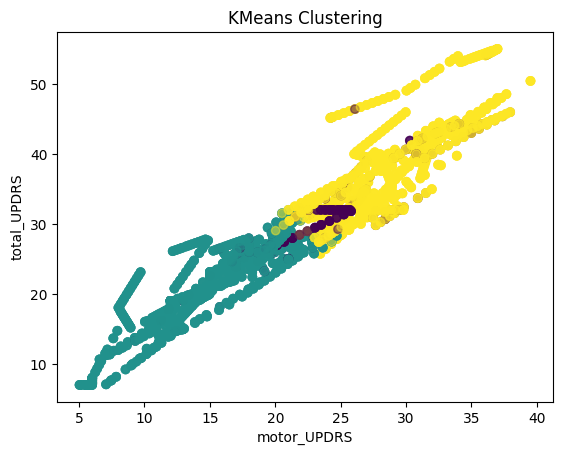

In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming dataFileA is your original data (replace this with your actual data)
dataFileA_np = np.array(normalizedA_data)

# Extract the numeric columns for clustering
numeric_columns = dataFileA_np[:, 3:]

# Specify the number of clusters (you can adjust this based on your data)
num_clusters = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_columns)

# Add the cluster labels to the original DataFrame
dataFileA['Cluster'] = clusters

# Display the cluster assignments
print("Cluster Assignments:")
print(dataFileA[['subject#', 'age', 'sex', 'Cluster']])

# Scatter plot
plt.scatter(dataFileA['motor_UPDRS'], dataFileA['total_UPDRS'], c=dataFileA['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('motor_UPDRS')
plt.ylabel('total_UPDRS')
plt.title('KMeans Clustering')
plt.show()


Accuracy: 93.62%
Confusion Matrix:
[[  0  27  35]
 [  0 611  10]
 [  0   3 489]]


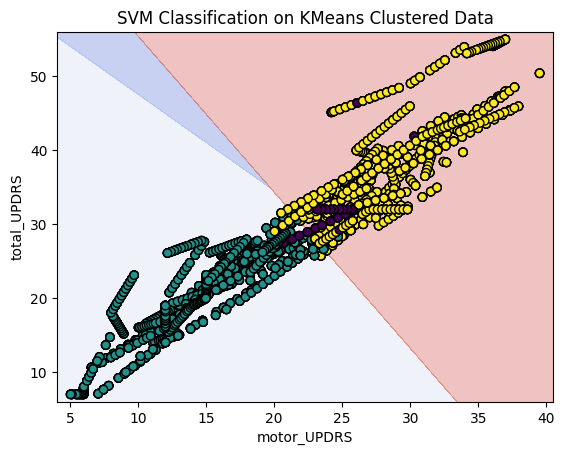

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming dataFileA is your original data with the added 'Cluster' column (replace this with your actual data)
# ...

# Features (X): Use relevant columns based on your data
features = dataFileA[['motor_UPDRS', 'total_UPDRS']].values

# Labels (y): Cluster assignments obtained from k-means
labels = dataFileA['Cluster'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Scatter plot of the SVM decision boundary
h = .02  # step size in the mesh
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', edgecolors='k', marker='o')
plt.xlabel('motor_UPDRS')
plt.ylabel('total_UPDRS')
plt.title('SVM Classification on KMeans Clustered Data')
plt.show()


do classification on motor and totalupdrs

Cluster Assignments:
[[ 1.         72.          0.         ...  0.0977927   0.19454397
  -1.        ]
 [ 1.         72.          0.         ...  0.14429969  0.12133479
  -1.        ]
 [ 1.         72.          0.         ...  0.08536238  0.26510433
  -1.        ]
 ...
 [42.         61.          0.         ...  0.18443509  0.16849243
  -1.        ]
 [42.         61.          0.         ...  0.140033    0.16915464
  -1.        ]
 [42.         61.          0.         ...  0.16136648  0.18510399
  -1.        ]]


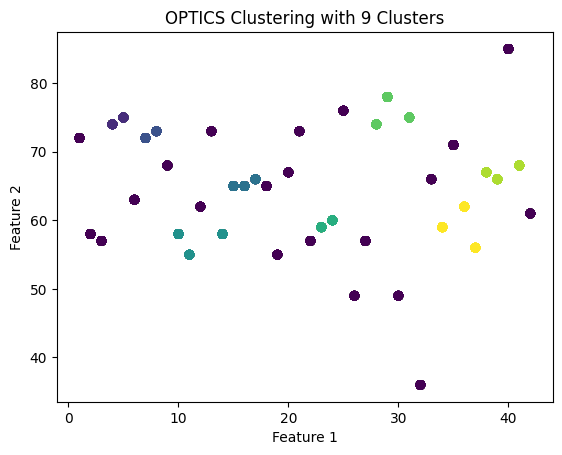

In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Assuming normalizedA_data is your normalized data (replace this with your actual normalized data)
# ...

# Features for clustering
features = normalizedA_data

# Perform OPTICS clustering
clustering = OPTICS(min_samples=3, xi=0.01, min_cluster_size=0.05)

# Extract cluster assignments
clusters = clustering.fit_predict(features)

# Use the same number of clusters as in your k-means example
num_clusters = len(np.unique(clusters))

# Add the cluster labels to the normalized data
normalizedA_data_with_clusters = np.column_stack((normalizedA_data, clusters))

# Display the cluster assignments
print("Cluster Assignments:")
print(normalizedA_data_with_clusters)

# Scatter plot
plt.scatter(normalizedA_data[:, 0], normalizedA_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'OPTICS Clustering with {num_clusters} Clusters')
plt.show()
